<a href="https://colab.research.google.com/github/PolMix/nems_ai/blob/main/main_Nems_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lib import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
import seaborn as sns

# COMSOL mesh research

In [2]:
!cd Mesh_calibration

/bin/bash: line 0: cd: Mesh_calibration: No such file or directory


In [3]:
filename = 'Mesh_calibration/Long_wire_mesh_calibration.txt'
df = pd.read_fwf(filename)

FileNotFoundError: ignored

In [ ]:
df = df.iloc[::4, :]
df.head()

,% d_t_1,d_t_2,d_beam_w,Frequency (Hz),Quality factor,abs(solid.Qted) (W)
0,1.0,3.0,5.0,146893.3506146738+4.080430168954004i,17999.738328,2.830813e-15
4,1.0,3.0,7.0,146875.54347841803+4.079793628304438i,18000.364339,2.822864e-15
8,1.0,3.0,9.0,146872.02014126454+4.079265164749243i,18002.264404,2.818759e-15
12,1.0,5.0,5.0,146890.006648569+4.080428633563947i,17999.335344,2.829826e-15
16,1.0,5.0,7.0,146868.4869987732+4.079937679816626i,17998.864018,2.821615e-15


In [ ]:
x = df.iloc[:, 1].to_numpy()
y = df.iloc[:, 2].to_numpy()
z = df.iloc[:, 4].to_numpy()

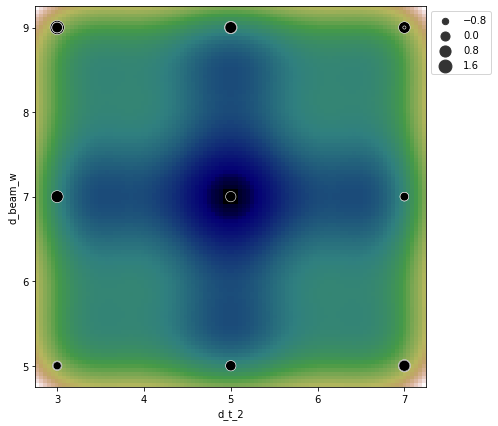

In [ ]:
offset = .25
xmin = x.min()-offset
xmax = x.max()+offset
ymin = y.min()-offset
ymax = y.max()+offset

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([x, y])
kernel = sps.gaussian_kde(values, weights=z)
Z = np.reshape(kernel(positions).T, X.shape)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax],
          aspect='auto'
         )
sns.scatterplot(
    data=df,
    x='d_t_2', y='d_beam_w',
    size='Quality factor', sizes=(10, 200),
    color='k'
)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

# Preprocessing main dataset

In [16]:
!wget 'https://github.com/PolMix/nems_ai/blob/3b17479f53bcdbe7328bb975eeb2848d9d5e9be7/data/Sweep_7_pars.txt'

--2023-02-27 17:45:51--  https://github.com/PolMix/nems_ai/blob/3b17479f53bcdbe7328bb975eeb2848d9d5e9be7/data/Sweep_7_pars.txt
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-02-27 17:45:51 ERROR 404: Not Found.

